# 超参数优化 HPO （HyperParameter Optimization）

当代超参数优化算法主要可以分为：
- 基于网格的各类搜索（Grid）
- 基于贝叶斯优化的各类优化算法（Baysian）
- 基于梯度的各类优化算法（Gradient-based）
- 基于种群的各类优化算法（进化算法、遗传算法等）

其中，各类网格搜索方法与基于贝叶斯的优化方法最为盛行，贝叶斯优化方法甚至可以被称为当代超参数优化中的SOTA模型。

In [1]:
# 网格搜索理论极限与缺点

In [2]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import cross_validate,KFold,GridSearchCV

In [3]:
import pandas as pd
data = pd.read_csv(r"/Users/feishuoren/Projects/machine_learning/datasets/HousePrice/train_encode.csv",index_col=0)
data.head()

,Id,住宅类型,住宅区域,街道接触面积(英尺),住宅面积,街道路面状况,巷子路面状况,住宅形状(大概),住宅现状,水电气,...,泳池面积,泳池质量,篱笆质量,其他配置,其他配置的价值,销售月份,销售年份,销售类型,销售状态,SalePrice
0,0.0,5.0,3.0,36.0,327.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0,4.0,208500
1,1.0,0.0,3.0,51.0,498.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,1.0,8.0,4.0,181500
2,2.0,5.0,3.0,39.0,702.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,2.0,8.0,4.0,223500
3,3.0,6.0,3.0,31.0,489.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0,140000
4,4.0,5.0,3.0,55.0,925.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,2.0,8.0,4.0,250000


In [4]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [5]:
X.head()

,Id,住宅类型,住宅区域,街道接触面积(英尺),住宅面积,街道路面状况,巷子路面状况,住宅形状(大概),住宅现状,水电气,...,半开放式门廊面积,泳池面积,泳池质量,篱笆质量,其他配置,其他配置的价值,销售月份,销售年份,销售类型,销售状态
0,0.0,5.0,3.0,36.0,327.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0,4.0
1,1.0,0.0,3.0,51.0,498.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,8.0,4.0
2,2.0,5.0,3.0,39.0,702.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0,8.0,4.0
3,3.0,6.0,3.0,31.0,489.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0
4,4.0,5.0,3.0,55.0,925.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,8.0,4.0


In [6]:
y.describe() # 在该数据情况下（均值大）RMSE也会很大

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
# 参数空间
import numpy as np

param_grid_simple = {"criterion": ["squared_error","poisson"]
                     , 'n_estimators': [*range(20,100,5)]
                     , 'max_depth': [*range(10,25,2)]
                     , "max_features": ["log2","sqrt",16,32,64,"auto"]
                     , "min_impurity_decrease": [*np.arange(0,5,10)]
                    }

In [8]:
# 参数空间大小计算
2 * len([*range(20,100,5)]) * len([*range(10,25,2)]) * len(["log2","sqrt",16,32,64,"auto"]) * len([*np.arange(0,5,10)])

1536

In [9]:
# 直接使用循环计算
no_option = 1
for i in param_grid_simple:
    no_option *= len(param_grid_simple[i])
no_option

1536

In [10]:
#模型，交叉验证，网格搜索
reg = RFR(random_state=1412,verbose=True,n_jobs=-1)
cv = KFold(n_splits=5,shuffle=True,random_state=1412)
search = GridSearchCV(estimator=reg
                     ,param_grid=param_grid_simple
                     ,scoring = "neg_mean_squared_error"
                     ,verbose = True
                     ,cv = cv
                     ,n_jobs=-1)

In [11]:
# 打印时间
import time
start = time.time()
search.fit(X,y)
print(time.time() - start)

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s


1744.61070394516


[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    0.4s finished


In [12]:
search.best_estimator_

RandomForestRegressor(max_depth=24, max_features=16, min_impurity_decrease=0,
                      n_estimators=85, n_jobs=-1, random_state=1412,
                      verbose=True)

In [13]:
abs(search.best_score_)**0.5

29251.284326350575

In [14]:
# 按最优参数重建模型，查看效果

ad_reg = RFR(n_estimators=85,max_depth=23,max_features=16,random_state=1412)
result_post_adjusted=cross_validate(ad_reg,X,y,cv=cv,scoring="neg_mean_squared_error"
                                   ,return_train_score=True
                                   ,verbose=True
                                   ,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


In [15]:
def RMSE(cvresult,key):
    return (abs(cvresult[key])**0.5).mean()

In [16]:
RMSE(result_post_adjusted,"train_score")

11000.81099038192

In [17]:
RMSE(result_post_adjusted,"test_score")

28572.070208366855

In [18]:
# 打包函数

# 评估指标RMSE
def RMSE(cvresult,key):
    return (abs(cvresult[key])**0.5).mean()

# 计算参数空间大小
def count_space(param):
    no_option = 1
    for i in param_grid_simple:
        no_option *= len(param_grid_simple[i])
    print(no_option)
    
# 在最优参数上进行重新建模验证结果
def rebuild_on_best_param(ad_reg):
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    result_post_adjusted = cross_validate(ad_reg,X,y,cv=cv,scoring="neg_mean_squared_error"
                                         ,return_train_score=True
                                         ,verbose=True
                                         ,n_jobs=-1)
    print("训练RMSE:{:.3f}".format(RMSE(result_post_adjusted,"train_score")))
    print("测试RMSE:{:.3f}".format(RMSE(result_post_adjusted,"test_score")))    

In [19]:
# 随机网格搜索实现

In [21]:
from sklearn.model_selection import RandomizedSearchCV

In [22]:
# param_distributions 可以接受连续输入，一般普通网格只接受离散输入

- 相同的全域参数空间

In [23]:
# 创建参数空间 使用与网格搜索时完全一致的空间，以便于对比
param_grid_simple = {"criterion": ["squared_error","poisson"]
                     , 'n_estimators': [*range(20,100,5)]
                     , 'max_depth': [*range(10,25,2)]
                     , "max_features": ["log2","sqrt",16,32,64,"auto"]
                     , "min_impurity_decrease": [*np.arange(0,5,10)]
                    }
#模型，交叉验证，网格搜索
reg = RFR(random_state=1412,verbose=True,n_jobs=-1)
cv = KFold(n_splits=5,shuffle=True,random_state=1412)

In [24]:
# 计算全域参数空间大小，即是能抽样的最大值
count_space(param_grid_simple)

1536


In [28]:
# 定义随机搜索
search = RandomizedSearchCV(estimator=reg
                            ,param_distributions=param_grid_simple
                            ,n_iter = 800 # 子空间的大小是全域空间的一半左右
                            ,scoring = "neg_mean_squared_error"
                            ,verbose = True
                            ,cv = cv
                            ,random_state = 1412
                            ,n_jobs=-1)

In [29]:
start = time.time()
search.fit(X,y)
print(time.time() - start)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s


1275.472405910492


[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    0.5s finished


In [30]:
# 查看模型结果
search.best_estimator_

RandomForestRegressor(max_depth=24, max_features=16, min_impurity_decrease=0,
                      n_estimators=85, n_jobs=-1, random_state=1412,
                      verbose=True)

In [31]:
abs(search.best_score_)**0.5

29251.284326350575

In [32]:
# 根据最优参数重建模型
ad_reg = RFR(max_depth=24,max_features=16,min_impurity_decrease=0,
            n_estimators=85,n_jobs=-1,random_state=1412,
            verbose=True)
rebuild_on_best_param(ad_reg)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


训练RMSE:11031.299
测试RMSE:28639.969


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.6s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished


随机网格搜索可以代替枚举的根本原因：
- 抽样出的子空间可以在一定程度上反馈出全域空间的分布，且子空间相对越大，子空间分布越接近全域空间的分布
- 当全域空间本身足够密集时，很小的子空间也能获得与全域空间相似的分布
- 如果全域空间包括了理论上的损失函数最小值，那一个与全域空间分布高度相似的子空间很可能也包括损失函数的最小值，或包括非常接近最小值的一系列次小值

In [34]:
from mpl_toolkits.mplot3d import axes3d

In [35]:
# get_test_data 自动获取数据，可以自动生成符合某一分布的数据
# 0.05 指参数空间中点与点的距离，该参数越小取出来的样本越多
# p1,p1组合 对应 损失函数值MSE
p1,p2,MSE = axes3d.get_test_data(0.05)



In [36]:
len(p1)

120

In [37]:
len(p2)

120

In [38]:
MSE.shape

(120, 120)

In [39]:
np.min(MSE)

-73.39620971601681

In [40]:
# 抽样10000，共14400，将没有被抽到子空间中的点置为空值

In [41]:
n = 10000
# 未被抽到子空间的点的索引
unsampled = np.random.randint(0,14400,14400-n)

In [42]:
p1,p2,MSE = axes3d.get_test_data(0.05)

# 拉平MSE，并将没抽中的点的损失函数变为空值
MSE = MSE.ravel()
MSE[unsampled] = np.nan
MSE = MSE.reshape(120,120)

-73.39620971601681


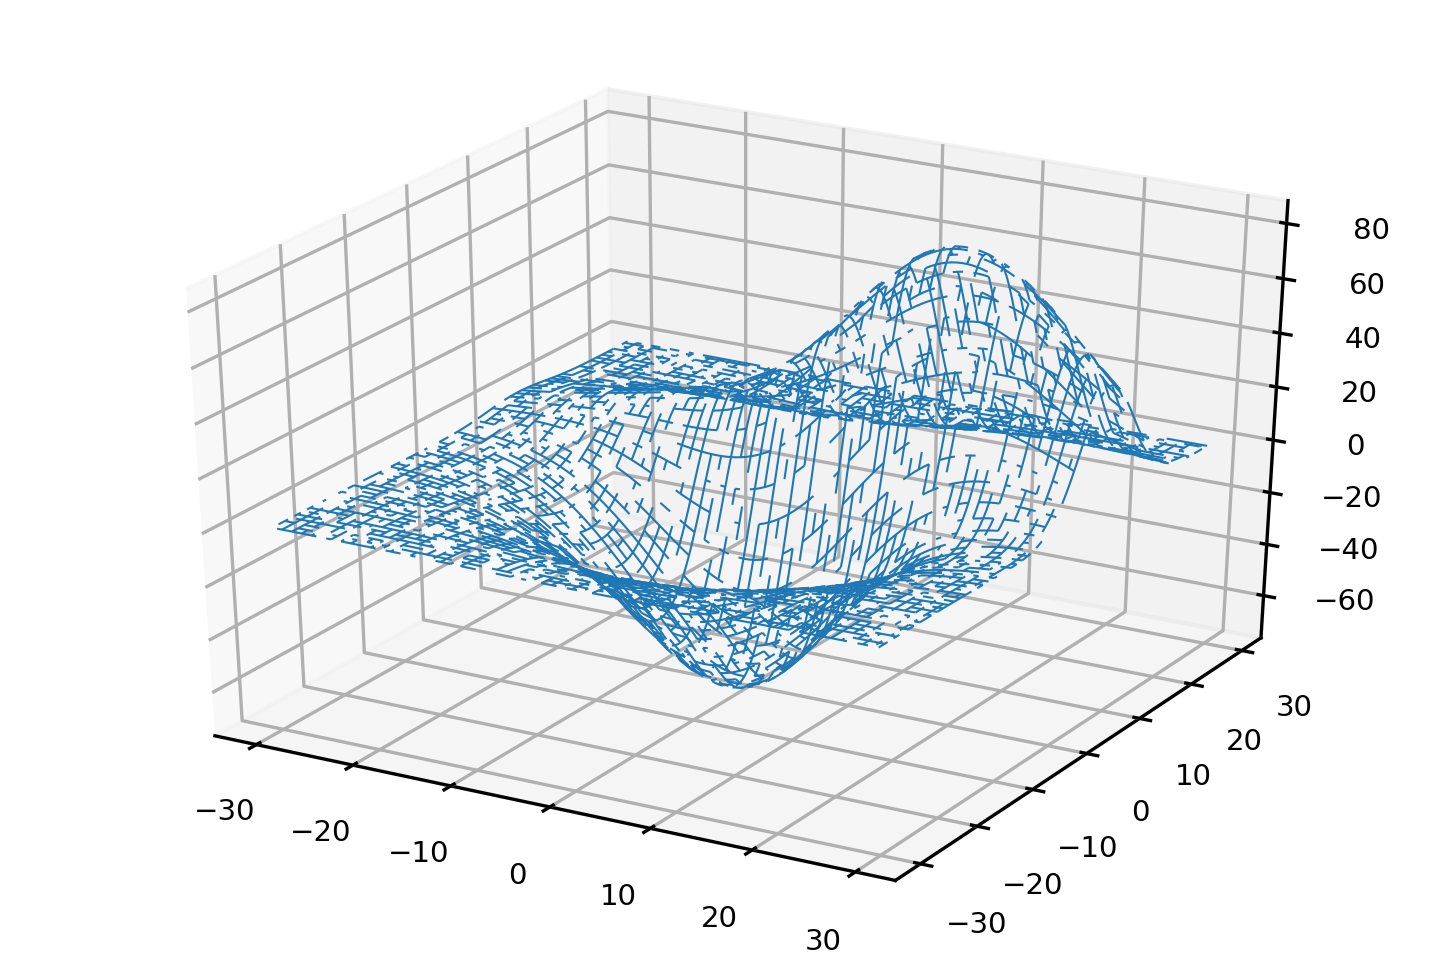

In [46]:
import matplotlib.pyplot as plt

plt.figure(dpi=300)
ax = plt.axes(projection="3d")

ax.plot_wireframe(p1,p2,MSE,rstride=2,cstride=2,linewidth=0.5)
ax.zaxis.set_tick_params(labelsize=7)
ax.yaxis.set_tick_params(labelsize=7)
ax.xaxis.set_tick_params(labelsize=7)

MSE = MSE.ravel().tolist()
MSE = [x for x in MSE if str(x) != 'nan']
print(np.min(MSE))

In [47]:
# 使用scipy帮助我们建立分布
import scipy

# 均匀uniform、指数expon、gamma分布

In [49]:
scipy.stats.uniform(loc=1,scale=100) # 均匀分布

In [51]:
# 连续型搜索更适用于学习率（无上限、可以是浮点数）

param_grid_simple = {'n_estimators':[*range(80,100,1)]
                     ,'max_depth':[*range(10,25,1)]
                     ,'max_features':[*range(10,20,1)]
                     ,'min_impurity_decrease':scipy.stats.uniform(0,50)
                    }

In [53]:
# 建立回归器、交叉验证
reg = RFR(random_state=1412,verbose=True,n_jobs=12)
cv = KFold(n_splits=5,shuffle=True,random_state=1412)

# 定义随机搜索
search = RandomizedSearchCV(estimator=reg
                           ,param_distributions=param_grid_simple
                           ,n_iter=1536
                           ,scoring="neg_mean_squared_error"
                           ,verbose=True
                           ,cv=cv
                           ,random_state=1412
                           ,n_jobs=12)

In [54]:
start = time.time()
search.fit(X,y)
end = time.time() - start
print(end/60)

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s


23.576809219519298


[Parallel(n_jobs=12)]: Done  85 out of  85 | elapsed:    0.4s finished


In [55]:
# 查看最佳评估器
search.best_estimator_

RandomForestRegressor(max_depth=22, max_features=14,
                      min_impurity_decrease=26.497676476036418, n_estimators=85,
                      n_jobs=12, random_state=1412, verbose=True)

In [56]:
# 查看最终评估指标
abs(search.best_score_)**0.5

29113.405359664695

In [57]:
rebuild_on_best_param(search.best_estimator_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.8s


训练RMSE:11296.682
测试RMSE:28455.434


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
